In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
OMP_NUM_THREADS = 1

data = pd.read_csv('coordenadas.csv')  
data.describe()

,Latitud,Longitud
count,61.000000,61.000000
mean,19.321186,-98.903862
std,0.015748,0.031403
min,19.292192,-98.947491
25%,19.311296,-98.930115
50%,19.320622,-98.909760
75%,19.327468,-98.887281
max,19.383466,-98.818836


In [2]:
data.head()

,Colonia,Latitud,Longitud
0,Tejolote,19.318263,-98.909562
1,Plutarco Elías Calles,19.328421,-98.896044
2,Tlayehuale,19.320700,-98.894735
3,Jorge Jiménez Cantú,19.309579,-98.846431
4,Rincón del Bosque,19.319534,-98.928092


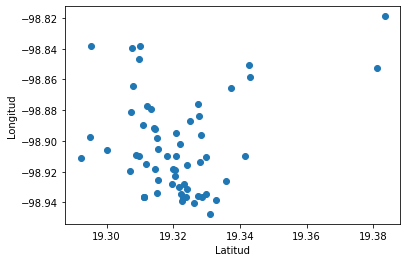

In [3]:
## Primer paso : Ubicacion de colonias
plt.scatter(data['Latitud'], data['Longitud'])
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

C:\Users\maigu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


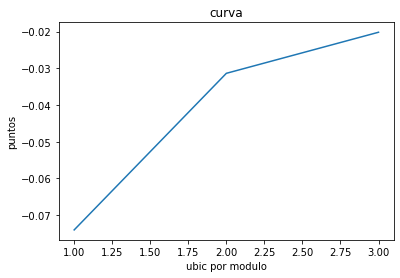

[[ 19.31425324 -98.8955793 ]
 [ 19.32249564 -98.92852019]
 [ 19.33181738 -98.84728334]]


,Latitud,Longitud
0,19.314253,-98.895579
1,19.322496,-98.928520
2,19.331817,-98.847283


In [29]:
## Paso 2: Ubicacion de modulos

def CalUbicacion(data):
    modulos = []
    X = np.array(data[['Latitud','Longitud']])
    Y = np.array(data['Colonia'])
    X.shape
    nc = range(1,4)
    kmeans = [KMeans(n_clusters=i)for i in nc]
    kmeans
    score = [kmeans[i].fit(X).score(X)for i in range(len(kmeans))]
    score
    plt.plot(nc,score)
    plt.xlabel('ubic por modulo')
    plt.ylabel('puntos')
    plt.title('curva')
    plt.show()
    kmeans = KMeans(n_clusters=3).fit(X)
    centroids = kmeans.cluster_centers_
    print(centroids)
    modulosCoordenadas = {
        'Latitud' : [centroids[0,0], centroids[1,0],centroids[2,0]],
        'Longitud': [centroids[0,1], centroids[1,1], centroids[2,1]]
    }
    modulos = pd.DataFrame(modulosCoordenadas)
    modulos.head()
    return modulos
    
mod = CalUbicacion(data)
df = pd.DataFrame(data=mod, columns=['Latitud','Longitud'])
df

In [30]:
df

,Latitud,Longitud
0,19.314253,-98.895579
1,19.322496,-98.928520
2,19.331817,-98.847283


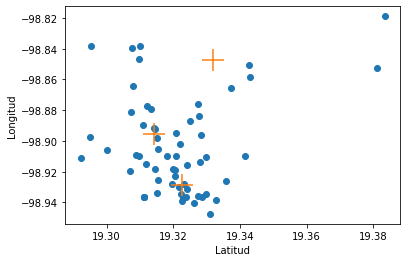

In [31]:
## Paso 3
#Graficar las coordenadas propuesta para ver la relación con los otros municipios.

plt.scatter(data['Latitud'], data['Longitud'])
plt.scatter(df['Latitud'], df['Longitud'], marker='+', s=500)
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

In [28]:
#Guardar dataframe con los puntos de los modulos
df.to_csv("resultados.csv", index=False)


In [ ]:
#saber registros por cada campo
#print(data.groupby('Colonia').size())
#print(data.groupby('Latitud').size())
#print(data.groupby('Longitud').size())



#f1 = data['Latitud'].values
#f2 = data['Longitud'].values
#plt.scatter(f1, f2, c=asignar, s=70)
#plt.scatter(C[:,0], C[:2], maker='*', c=colores, s=1000)
#plt.xlabel("Latitud")
#plt.ylabel("Longitud")
#plt.show()

In [ ]:
print(centroids)
type(centroids)